

# Objetivo do experimento

> Testar diferentes técnicas de ML para determinar se os clientes de um banco vão sair ou não.(Churn)
> Utilizarei as seguintes tecnicas:
> <ul>
> <li>KNN</li>
> <li>Árvore de Decisão</li>
> <li>Random Forests</li>
> <li>SVM</li>
> <li>GBC</li>
> <li>Bônus - MPL</li>
> </ul>

# Sobre o DataSet

> Dataset retirado do site Kaggle <br>  https://www.kaggle.com/shivan118/churn-modeling-dataset

| Coluna | Descrição   |
|------|------|
|   RowNumber  | Número da linha|
|   CustomerId  | ID do Cliente|
|   Surname  | Sobrenome|
|   CreditScore  | Score de Crédito|
|   Geography  | País/Região|
|   Gender  | Sexo|
|   Age  | Idade|
|   Tenure  | Número de bens/propriedades|
|   Balance  | Saldo em conta|
|   NumOfProducts  | Número de produtos do banco|
|   HasCrCard  | Se possui Cartão de Crédito|
|   IsActiveMember  | Se é cliente Ativo|
|   EstimatedSalary  | Salário Estimado|
|   Exited  | Se deixou o banco|

In [1]:
#Bibliotecas basicas
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

# biblioteca para treino e teste
from sklearn.model_selection import train_test_split

# bibliotecas dos modelos de aprendizagem supervisionada
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.model_selection import cross_val_score
from sklearn import preprocessing

#bibliotecas de métricas
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,mean_squared_error
from sklearn.metrics import roc_curve, auc
import sklearn.metrics as skm
import statsmodels.api as sm

#Bibliotecas de graficos
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Importando o DataSet
file = 'Churn_Modelling.csv'
df = pd.read_csv(file, sep=',')

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
#df.info()
#df.describe()
summary=df.describe()
summary.transpose()

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5.000500e+03,2886.895680,1.00,2500.75,5.000500e+03,7.500250e+03,10000.00
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48


> ## Análise Exploratória

Testando algumas correções de idade, gênero e salário.

<AxesSubplot:xlabel='Geography', ylabel='count'>

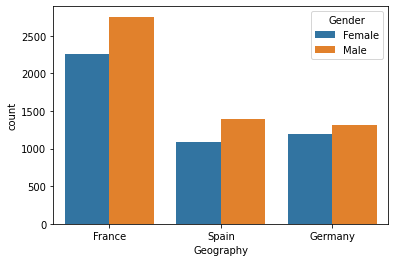

In [5]:
#grafico comparativo de sexo por região
sns.countplot(x=df['Geography'],hue='Gender',data=df)

<AxesSubplot:xlabel='Age', ylabel='EstimatedSalary'>

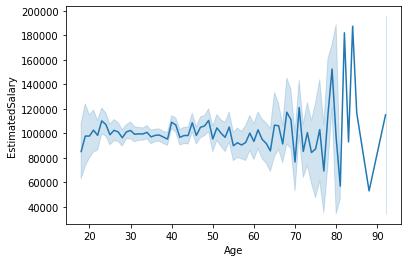

In [6]:
# estimativa de salario por idade
sns.lineplot(x=df['Age'],y=df['EstimatedSalary'],data=df)

Text(0.5, 0, 'Age')

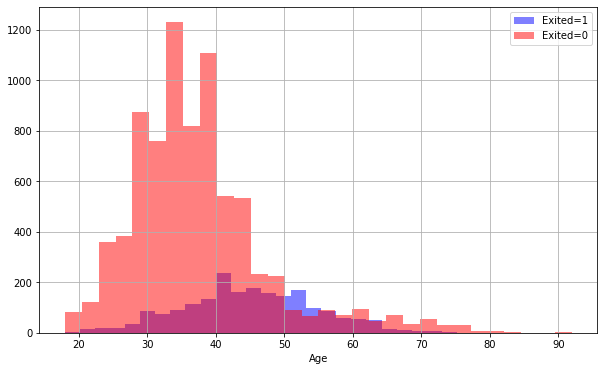

In [7]:
# churn por idade
plt.figure(figsize=(10,6))
df[df['Exited']==1]['Age'].hist(alpha=0.5,color='blue',
                                              bins=30,label='Exited=1')
df[df['Exited']==0]['Age'].hist(alpha=0.5,color='red',
                                              bins=30,label='Exited=0')
plt.legend()
plt.xlabel('Age')

<AxesSubplot:xlabel='Exited', ylabel='count'>

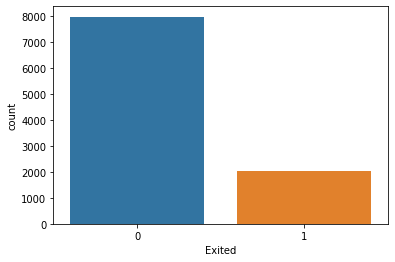

In [8]:
# proporção do churn
sns.countplot(df['Exited'])

> ## Correlações


In [9]:
correlacoes = df.corr()

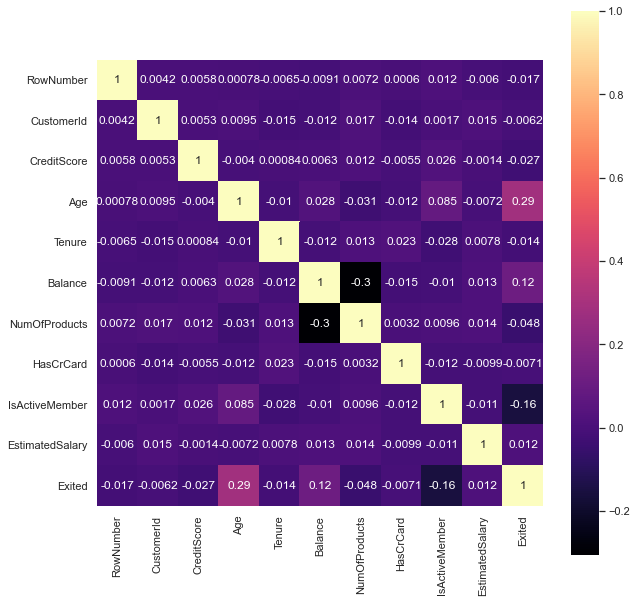

In [10]:
# Usando o método heatmap do seaborn
plt.figure(figsize=(10, 10))
sns.set(style = 'white')
sns.heatmap(df.select_dtypes(include='number').corr(), annot = True, cmap = 'magma', square = True);

<Figure size 576x360 with 0 Axes>

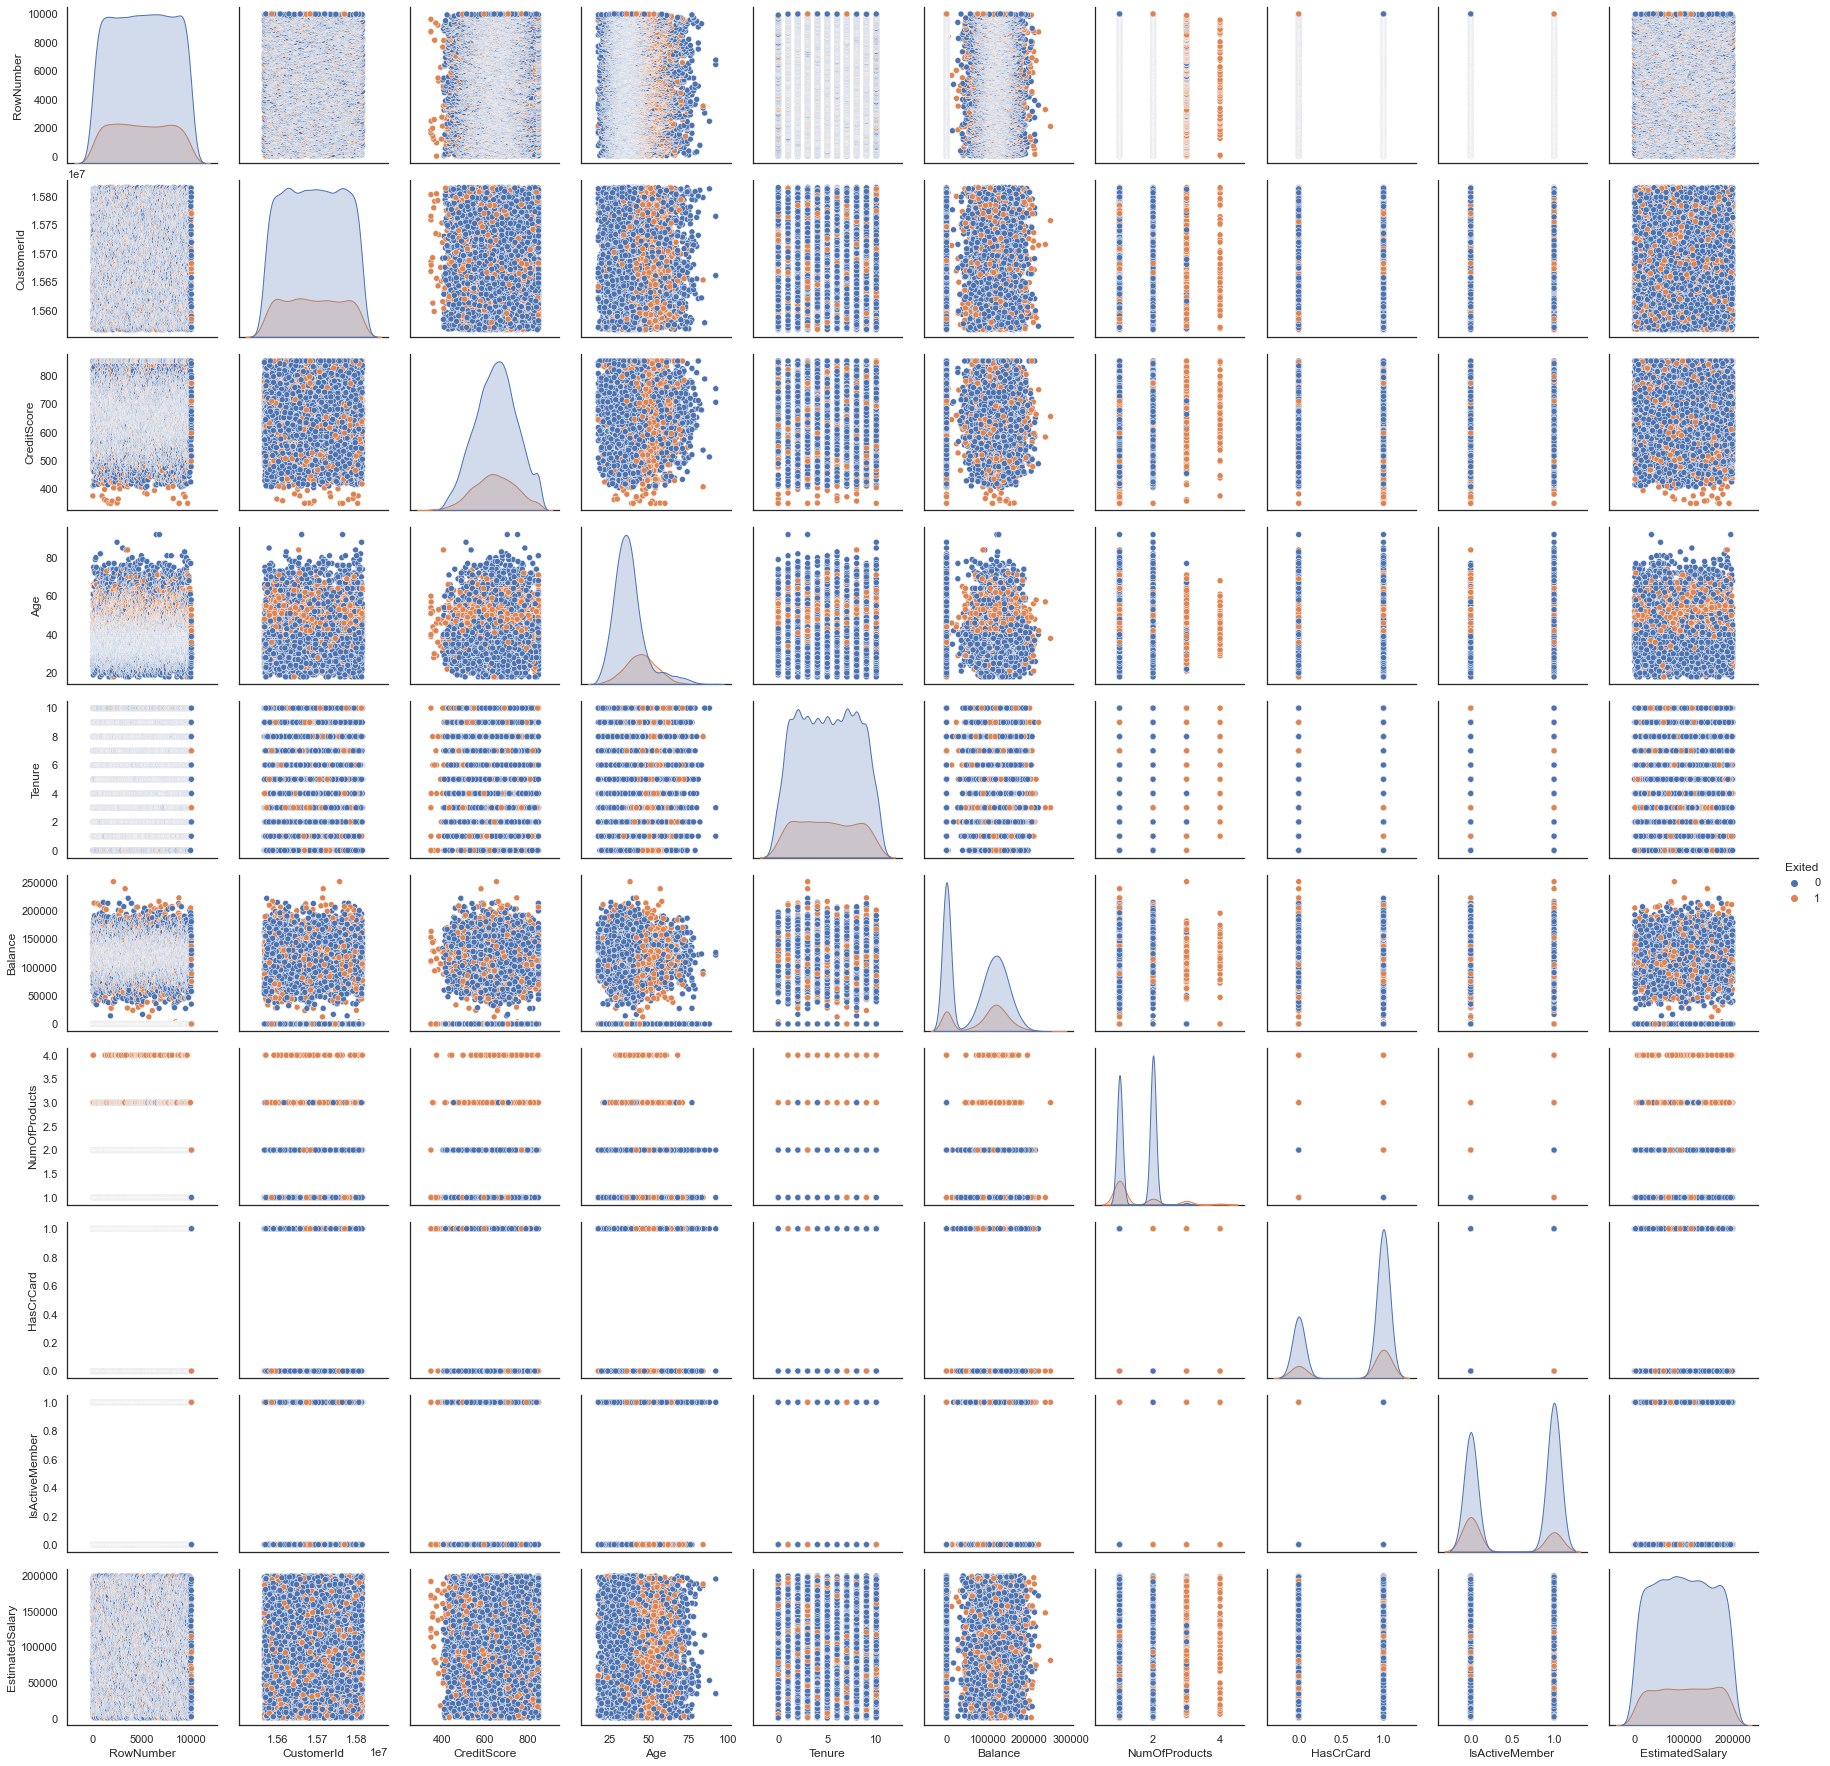

In [11]:
plt.figure(figsize=(8, 5))
sns.pairplot(data = df, hue = 'Exited');

> ## Otimização do DataSet
> <b>Verificando se existem NaN ou Nulos

In [12]:
print('Existem valores NULOS : {} '.format(df.isna().values.any()))
print('Existem valores NaN : {} '.format(df.isnull().values.any()))

Existem valores NULOS : False 
Existem valores NaN : False 


> <b>Eliminado colunas desnecessárias

In [13]:
df = df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

> <b>Transformando colunas do tipo objeto em numero inteiro

In [14]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in list(df.columns):
    if df[i].dtype=='object':
        df[i]=le.fit_transform(df[i])

 > ## Dividindo Treino e Teste
 > <b>Proporção Normal

In [15]:
X = df.ix[:, df.columns != 'Exited']
y = df.ix[:, df.columns == 'Exited']

> <b>Proporção Balanceada

In [16]:
# Números de dados da classe minoritária
Nr_Exited = len(df[df.Exited == 1])
Exited_Indices = np.array(df[df.Exited == 1].index)

# Escolher indice da classe normal
Not_Exited_Indices = df[df.Exited == 0].index

# Dos índices que escolhemos, selecione aleatoriamente o número "x"  (Nr_Exited)
Random_Not_Exited_Indices = np.random.choice(Not_Exited_Indices, Nr_Exited, replace = False)
Random_Not_Exited_Indices = np.array(Random_Not_Exited_Indices)

# Unindo os 2 índices
Amostra_Indices = np.concatenate([Exited_Indices,Random_Not_Exited_Indices])

# Conjunto de dados de Amostra
Amostra_df = df.iloc[Amostra_Indices,:]

X_Amostra = Amostra_df.ix[:, Amostra_df.columns != 'Exited']
y_Amostra = Amostra_df.ix[:, Amostra_df.columns == 'Exited']

# Mostrar divisão
print("% que PERMANECE no Banco: ", len(Amostra_df[Amostra_df.Exited == 0])/len(Amostra_df))
print("% que SAIU do Banco: ", len(Amostra_df[Amostra_df.Exited == 1])/len(Amostra_df))
print("Total de registros do dataset de amostra: ", len(Amostra_df))

% que PERMANECE no Banco:  0.5
% que SAIU do Banco:  0.5
Total de registros do dataset de amostra:  4074


> <b>Dividindo os dados em Treino(70%) e Teste(30%)

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [18]:
X_train_Amostra, X_test_Amostra, y_train_Amostra, y_test_Amostra = train_test_split(X_Amostra,y_Amostra, test_size=0.30, random_state=101)

> <b>Normalizando Valores de Treino

In [19]:
columns = ['CreditScore', 'Balance', 'EstimatedSalary']

## Subtrair a Média e dividir pelo erro padrão.
for col in columns:
    colMean = X_train[col].mean()
    colStdDev = X_train[col].std()
    X_train[col] = X_train[col].apply(lambda x : (x - colMean) / colStdDev)
    X_test[col] = X_test[col].apply(lambda x : (x - colMean) / colStdDev) 

In [20]:
## Normalizando valores na Amostra Balanceada 
for col in columns:
    colMean = X_train_Amostra[col].mean()
    colStdDev = X_train_Amostra[col].std()
    X_train_Amostra[col] = X_train_Amostra[col].apply(lambda x : (x - colMean) / colStdDev)
    X_test_Amostra[col] = X_test_Amostra[col].apply(lambda x : (x - colMean) / colStdDev) 

In [21]:
X_train.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
803,-1.450470,2,0,29,9,-1.237962,2,0,1,0.703032
1387,0.763232,0,1,66,4,0.149454,1,1,1,0.716874
921,-0.436719,2,1,61,1,-1.237962,1,1,0,-1.343699
5917,0.235668,0,0,31,1,-1.237962,1,1,0,0.500089
9610,-2.029757,0,1,40,1,-1.237962,3,0,1,0.517769


## Métricas Utilizadas

>MATRIZ DE CONFUSÃO - É a matriz quadrada em que se compara os verdadeiros valores de uma classificação com os valores preditos através de algum modelo. 

>ACURÁCIA - é a métrica mais simples, ela representa o número de previsões corretas do modelo. Ótima métrica para utilizar quando os dados estão balanceados

>MSE - Talvez seja a mais utilizada, esta função calcula a média dos erros do modelo.

>SENSIBILIDADE - ou Recall é a proporção dos Verdadeiros Positivos entre todas as observações que realmente são positivas no seu conjunto de dados.

>ESPECIFICIDADE - É a proporção dos Verdadeiros Negativos entre todas as observações que realmente são negativas no seu conjunto de dados. 



## Funções

In [22]:
#funçao para calcular Sensibilidade e Especificidade
def sens_espec(y,x):
    VP = confusion_matrix(y,x)[0][0]
    FN = confusion_matrix(y,x)[0][1]
    FP = confusion_matrix(y,x)[1][0]
    VN = confusion_matrix(y,x)[1][1]
    Sensibilidade = VP / (VP + FN)
    Especificidade = VN / (VN + FP)
    print('Sensibilidade: ',round(Sensibilidade,3))
    print('Especificidade: ',round(Especificidade,3))
    return round(Sensibilidade,3), round(Especificidade,3)

#funçao para calcular Acurácia e MSE
def metricas(y,x):
    print('Acurácia: ',round(accuracy_score(y,x),3))
    print('MSE: ',round(mean_squared_error(y,x),3))
    return round(accuracy_score(y,x),3)

#funçao para calcular Matriz de Confusão
def matrix_confusao(matriz):
    ax= plt.subplot()
    sns.heatmap(matriz, annot=True, annot_kws={'size':15}, ax = ax, fmt='g');
    ax.set_xlabel('Predição')
    ax.set_ylabel('Valor Real')
    ax.set_title('Matriz de Confusão')
    ax.xaxis.set_ticklabels(['Ficou', 'Saiu']) 
    ax.yaxis.set_ticklabels(['Ficou', 'Saiu'])

#funçao para calcular curva roc
def curva_roc(y_test,predicao):
    # Calcula a curva ROC para cada curva
    fpr, tpr, _ = roc_curve(y_test[:],predicao[:])
    roc_auc = auc(fpr, tpr)
    # Plot a curva ROC de cada uma das classes existentes
    plt.figure()
    plt.plot(fpr, tpr, label='Curva ROC (area = %0.2f)' % roc_auc, color="red", linewidth=3)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Taxa de Falso Positivo')
    plt.ylabel('Taxa de Verdadeiro Positivo')
    plt.title('Exemplo ROC - Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()


In [23]:
# criando uma lista para os resultados
lista_scores_acc = []
lista_scores_espec = []
lista_scores_acc_B = []
lista_scores_espec_B = []

> ## Definindo um baseline
> Baseline é importante para criar um marco na análise, e saber se o modelo é mais eficaz do que uma simples média/mediana, por exemplo, neste casos utilizei o metodo de chutar a resposta maioritária

In [24]:
df.groupby('Exited').size()

Exited
0    7963
1    2037
dtype: int64

In [25]:
baseline_predict = np.full((3000, 1), 0)
baseline_predict_Amostra = np.full((1223, 1), 0)
print(classification_report(y_test,baseline_predict))

              precision    recall  f1-score   support

           0       0.79      1.00      0.88      2378
           1       0.00      0.00      0.00       622

    accuracy                           0.79      3000
   macro avg       0.40      0.50      0.44      3000
weighted avg       0.63      0.79      0.70      3000



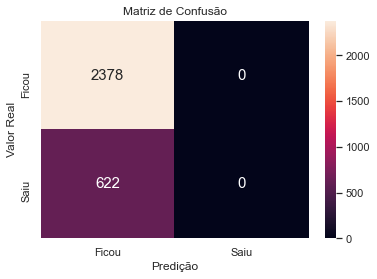

In [26]:
matrix_confusao(confusion_matrix(y_test,baseline_predict))

In [27]:
baseline_acc = metricas(y_test,baseline_predict)
baseline_sense, baseline_espec = sens_espec(y_test,baseline_predict)

Acurácia:  0.793
MSE:  0.207
Sensibilidade:  1.0
Especificidade:  0.0


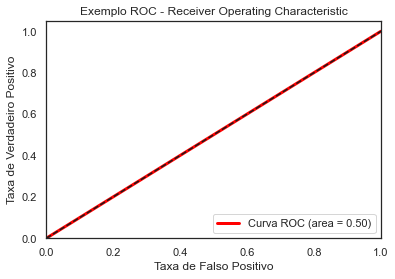

In [28]:
curva_roc(y_test,baseline_predict)

> Baseline Balanceado

In [29]:
print(classification_report(y_test_Amostra,baseline_predict_Amostra))

              precision    recall  f1-score   support

           0       0.50      1.00      0.67       615
           1       0.00      0.00      0.00       608

    accuracy                           0.50      1223
   macro avg       0.25      0.50      0.33      1223
weighted avg       0.25      0.50      0.34      1223



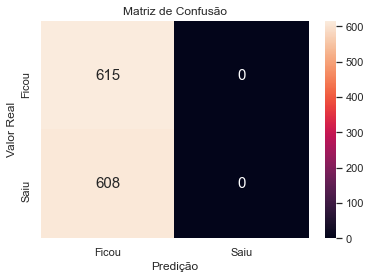

In [30]:
matrix_confusao(confusion_matrix(y_test_Amostra,baseline_predict_Amostra))

In [31]:
baseline_acc_B = metricas(y_test_Amostra,baseline_predict_Amostra)
baseline_sense_B, baseline_espec_B = sens_espec(y_test_Amostra,baseline_predict_Amostra)

Acurácia:  0.503
MSE:  0.497
Sensibilidade:  1.0
Especificidade:  0.0


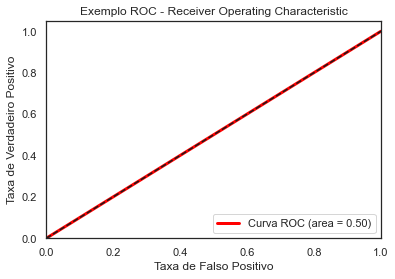

In [32]:
curva_roc(y_test_Amostra,baseline_predict_Amostra)

## KNN
> O k-Nearest Neighbor (k-Vizinhos Mais Pŕoximos), quando uma instância de teste chega, o algoritmo procura os k vizinhos mais próximos dele.


>1.DataSet Normal

In [33]:
acc_scores=[]
for i in [1,3,5,7,9,11]:
    knn_modelo = KNeighborsClassifier(n_neighbors=i)
    knn_modelo.fit(X_train,y_train)
    knn_predicao = knn_modelo.predict(X_test)
    acc = accuracy_score(y_test,knn_predicao)
    acc_scores.append(acc)

<AxesSubplot:>

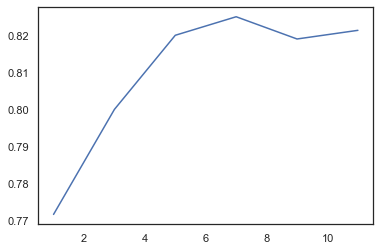

In [34]:
sns.lineplot(x=[1,3,5,7,9,11],y=acc_scores)

In [35]:
print(max(acc_scores))

0.825


In [36]:
knn_modelo = KNeighborsClassifier(n_neighbors=7)
knn_modelo.fit(X_train,y_train)
knn_predicao = knn_modelo.predict(X_test)

In [37]:
print(classification_report(y_test,knn_predicao))

              precision    recall  f1-score   support

           0       0.85      0.95      0.90      2378
           1       0.65      0.34      0.44       622

    accuracy                           0.82      3000
   macro avg       0.75      0.64      0.67      3000
weighted avg       0.81      0.82      0.80      3000



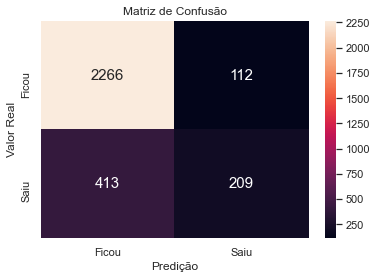

In [38]:
matrix_confusao(confusion_matrix(y_test,knn_predicao))

In [39]:
sense, espec = sens_espec(y_test,knn_predicao)
acc = metricas(y_test,knn_predicao)
lista_scores_acc.append(acc)
lista_scores_espec.append(espec)

Sensibilidade:  0.953
Especificidade:  0.336
Acurácia:  0.825
MSE:  0.175


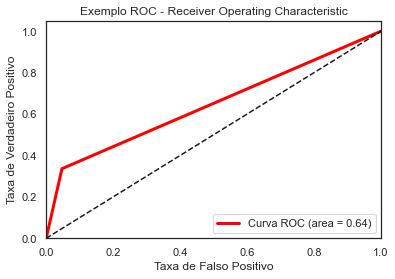

In [40]:
curva_roc(y_test,knn_predicao)

> 2.Dataset Balanceado

In [41]:
acc_scores_B=[]
for i in [1,3,5,7,9,11]:
    knn_modelo_B = KNeighborsClassifier(n_neighbors=i)
    knn_modelo_B.fit(X_train_Amostra,y_train_Amostra)
    knn_predicao_B = knn_modelo_B.predict(X_test_Amostra)
    acc_B = accuracy_score(y_test_Amostra,knn_predicao_B)
    acc_scores_B.append(acc_B)

<AxesSubplot:>

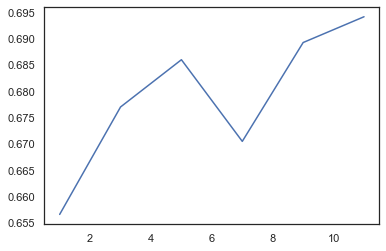

In [42]:
#curva de acurácia
sns.lineplot(x=[1,3,5,7,9,11],y=acc_scores_B)

In [43]:
knn_modelo_Amostra = KNeighborsClassifier(n_neighbors=11)
knn_modelo_Amostra.fit(X_train_Amostra,y_train_Amostra)
knn_predicao_Amostra = knn_modelo_Amostra.predict(X_test_Amostra)

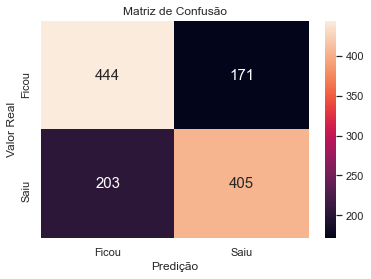

In [44]:
matrix_confusao(confusion_matrix(y_test_Amostra,knn_predicao_Amostra))

In [45]:
sense, espec = sens_espec(y_test_Amostra,knn_predicao_Amostra)
acc = metricas(y_test_Amostra,knn_predicao_Amostra)
lista_scores_acc_B.append(acc)
lista_scores_espec_B.append(espec)

Sensibilidade:  0.722
Especificidade:  0.666
Acurácia:  0.694
MSE:  0.306


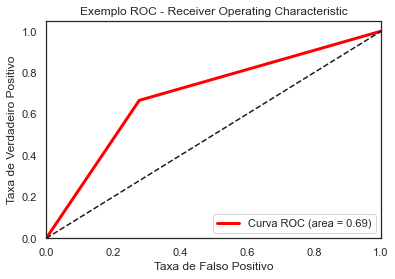

In [46]:
curva_roc(y_test_Amostra,knn_predicao_Amostra)

## Arvore Decisão
> Este algoritmo classifica a população para vários conjuntos com base em algumas propriedades escolhidas (variáveis independentes) de uma população.

> 1.Dataset Normal

In [47]:
DecisionTree_Modelo = DecisionTreeClassifier(random_state=100)
DecisionTree_Modelo.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=100, splitter='best')

In [48]:
tree_predicao = DecisionTree_Modelo.predict(X_test)
print(classification_report(y_test,tree_predicao))

              precision    recall  f1-score   support

           0       0.87      0.87      0.87      2378
           1       0.51      0.51      0.51       622

    accuracy                           0.80      3000
   macro avg       0.69      0.69      0.69      3000
weighted avg       0.80      0.80      0.80      3000



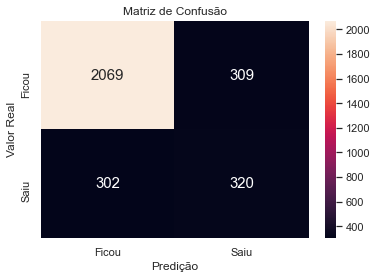

In [49]:
matrix_confusao(confusion_matrix(y_test,tree_predicao))

In [50]:
sense, espec = sens_espec(y_test,tree_predicao)
acc = metricas(y_test,tree_predicao)
lista_scores_acc.append(acc)
lista_scores_espec.append(espec)

Sensibilidade:  0.87
Especificidade:  0.514
Acurácia:  0.796
MSE:  0.204


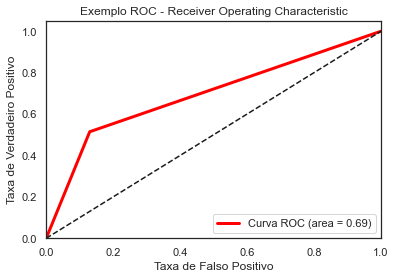

In [51]:
curva_roc(y_test,tree_predicao)

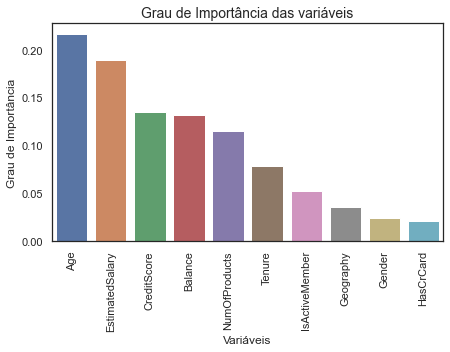

In [52]:
tmp = pd.DataFrame({'Variáveis': X.columns, 'Grau de Importância': DecisionTree_Modelo.feature_importances_})
tmp = tmp.sort_values(by='Grau de Importância',ascending=False)
plt.figure(figsize = (7,4))
plt.title('Grau de Importância das variáveis',fontsize=14)
s = sns.barplot(x='Variáveis',y='Grau de Importância',data=tmp)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()

> 2.Dataset Balanceado

In [53]:
DecisionTree_Modelo_B = DecisionTreeClassifier(random_state=100)
DecisionTree_Modelo_B.fit(X_train_Amostra,y_train_Amostra)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=100, splitter='best')

In [54]:
tree_predicao_B = DecisionTree_Modelo_B.predict(X_test_Amostra)
print(classification_report(y_test_Amostra,tree_predicao_B))

              precision    recall  f1-score   support

           0       0.68      0.68      0.68       615
           1       0.68      0.68      0.68       608

    accuracy                           0.68      1223
   macro avg       0.68      0.68      0.68      1223
weighted avg       0.68      0.68      0.68      1223



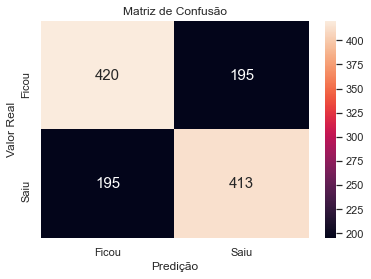

In [55]:
matrix_confusao(confusion_matrix(y_test_Amostra,tree_predicao_B))

In [56]:
sense, espec = sens_espec(y_test_Amostra,tree_predicao_B)
acc = metricas(y_test_Amostra,tree_predicao_B)
lista_scores_acc_B.append(acc)
lista_scores_espec_B.append(espec)

Sensibilidade:  0.683
Especificidade:  0.679
Acurácia:  0.681
MSE:  0.319


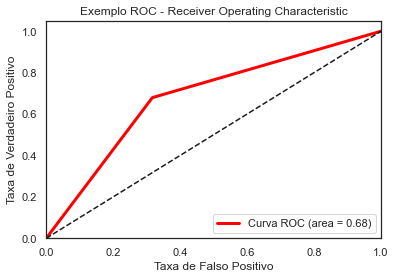

In [57]:
curva_roc(y_test_Amostra,tree_predicao_B)

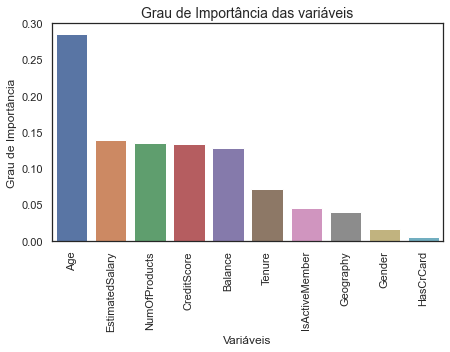

In [58]:
tmp = pd.DataFrame({'Variáveis': X.columns, 'Grau de Importância': DecisionTree_Modelo_B.feature_importances_})
tmp = tmp.sort_values(by='Grau de Importância',ascending=False)
plt.figure(figsize = (7,4))
plt.title('Grau de Importância das variáveis',fontsize=14)
s = sns.barplot(x='Variáveis',y='Grau de Importância',data=tmp)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()

## Randon Forest
> A floresta aleatória pode ser identificada como uma coleção de árvores de decisão como o próprio nome diz.

> 1.DataSet Normal

In [59]:
RF_Modelo = RandomForestClassifier(n_estimators=600, random_state=100)
RF_Modelo.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=600,
                       n_jobs=None, oob_score=False, random_state=100,
                       verbose=0, warm_start=False)

In [60]:
rf_predicao = RF_Modelo.predict(X_test)
print(classification_report(y_test,rf_predicao))

              precision    recall  f1-score   support

           0       0.88      0.97      0.92      2378
           1       0.80      0.49      0.60       622

    accuracy                           0.87      3000
   macro avg       0.84      0.73      0.76      3000
weighted avg       0.86      0.87      0.86      3000



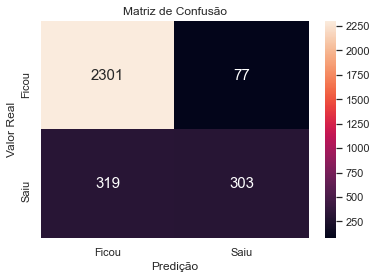

In [61]:
matrix_confusao(confusion_matrix(y_test,rf_predicao))

In [62]:
sense, espec = sens_espec(y_test,rf_predicao)
acc = metricas(y_test,rf_predicao)
lista_scores_acc.append(acc)
lista_scores_espec.append(espec)

Sensibilidade:  0.968
Especificidade:  0.487
Acurácia:  0.868
MSE:  0.132


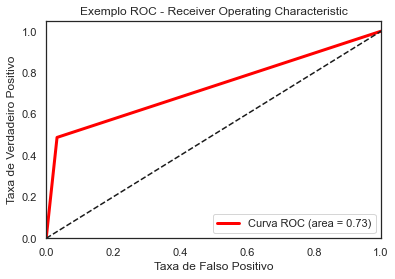

In [63]:
curva_roc(y_test,rf_predicao)

> 2.DataSet Balanceado

In [64]:
RF_Modelo_B = RandomForestClassifier(n_estimators=600, random_state=100)
RF_Modelo_B.fit(X_train_Amostra,y_train_Amostra)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=600,
                       n_jobs=None, oob_score=False, random_state=100,
                       verbose=0, warm_start=False)

In [65]:
rf_predicao_B = RF_Modelo_B.predict(X_test_Amostra)
print(classification_report(y_test_Amostra,rf_predicao_B))

              precision    recall  f1-score   support

           0       0.77      0.80      0.79       615
           1       0.79      0.76      0.77       608

    accuracy                           0.78      1223
   macro avg       0.78      0.78      0.78      1223
weighted avg       0.78      0.78      0.78      1223



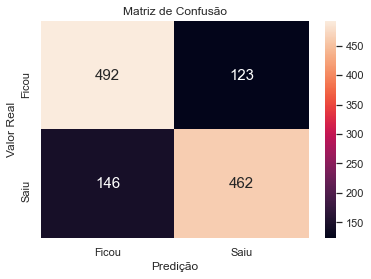

In [66]:
matrix_confusao(confusion_matrix(y_test_Amostra,rf_predicao_B))

In [67]:
sense, espec = sens_espec(y_test_Amostra,rf_predicao_B)
acc = metricas(y_test_Amostra,rf_predicao_B)
lista_scores_acc_B.append(acc)
lista_scores_espec_B.append(espec)

Sensibilidade:  0.8
Especificidade:  0.76
Acurácia:  0.78
MSE:  0.22


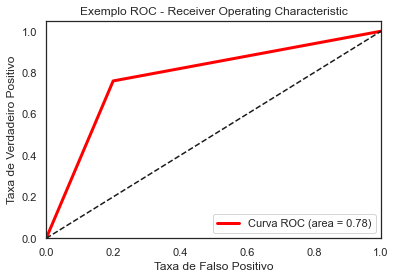

In [68]:
curva_roc(y_test_Amostra,rf_predicao_B)

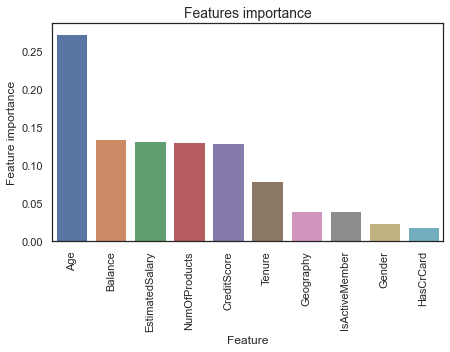

In [69]:
tmp = pd.DataFrame({'Feature': X.columns, 'Feature importance': RF_Modelo_B.feature_importances_})
tmp = tmp.sort_values(by='Feature importance',ascending=False)
plt.figure(figsize = (7,4))
plt.title('Features importance',fontsize=14)
s = sns.barplot(x='Feature',y='Feature importance',data=tmp)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()

## SVM
> SVM (Support Vector Machine), o algoritmo irá separar os pontos de dados usando uma linha. Esta linha é escolhida de tal forma que será mais importante dos pontos de dados mais próximos em 2 categorias.

> 1.Dataset Normal

In [70]:
svm_modelo = svm.SVC(kernel = 'linear', C = 1.0)
svm_modelo.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [71]:
svm_predicao = svm_modelo.predict(X_test)
print(classification_report(y_test,svm_predicao))

              precision    recall  f1-score   support

           0       0.79      1.00      0.88      2378
           1       0.00      0.00      0.00       622

    accuracy                           0.79      3000
   macro avg       0.40      0.50      0.44      3000
weighted avg       0.63      0.79      0.70      3000



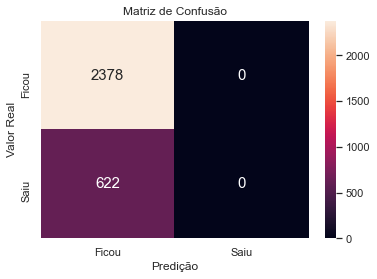

In [72]:
matrix_confusao(confusion_matrix(y_test,svm_predicao))

In [73]:
svm_modelo_sigmoid = svm.SVC(kernel = 'sigmoid', C = 1.0)
svm_modelo_sigmoid.fit(X_train,y_train)
svm_predicao_sig = svm_modelo_sigmoid.predict(X_test)
print(classification_report(y_test,svm_predicao_sig))

              precision    recall  f1-score   support

           0       0.79      1.00      0.88      2378
           1       0.00      0.00      0.00       622

    accuracy                           0.79      3000
   macro avg       0.40      0.50      0.44      3000
weighted avg       0.63      0.79      0.70      3000



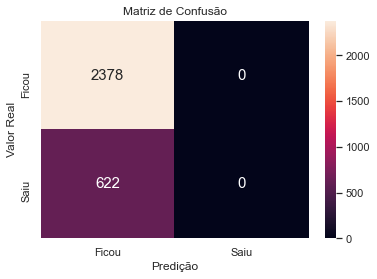

In [74]:
matrix_confusao(confusion_matrix(y_test,svm_predicao_sig))

In [75]:
svm_modelo_rbf = svm.SVC(kernel = 'rbf', C = 1.0)
svm_modelo_rbf.fit(X_train,y_train)
svm_predicao_rbf = svm_modelo_rbf.predict(X_test)
print(classification_report(y_test,svm_predicao_rbf))

              precision    recall  f1-score   support

           0       0.84      0.98      0.91      2378
           1       0.77      0.31      0.45       622

    accuracy                           0.84      3000
   macro avg       0.81      0.64      0.68      3000
weighted avg       0.83      0.84      0.81      3000



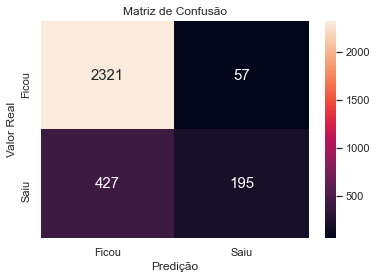

In [76]:
matrix_confusao(confusion_matrix(y_test,svm_predicao_rbf))

In [77]:
sense, espec = sens_espec(y_test,svm_predicao_rbf)
acc = metricas(y_test,svm_predicao_rbf)
lista_scores_acc.append(acc)
lista_scores_espec.append(espec)

Sensibilidade:  0.976
Especificidade:  0.314
Acurácia:  0.839
MSE:  0.161


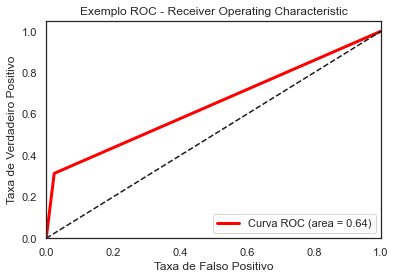

In [78]:
curva_roc(y_test,svm_predicao_rbf)

> 2.DataSet Balanceado

In [79]:
svm_modelo_rbf_B = svm.SVC(kernel = 'rbf', C = 1.0)
svm_modelo_rbf_B.fit(X_train_Amostra,y_train_Amostra)
svm_predicao_rbf_B = svm_modelo_rbf_B.predict(X_test_Amostra)

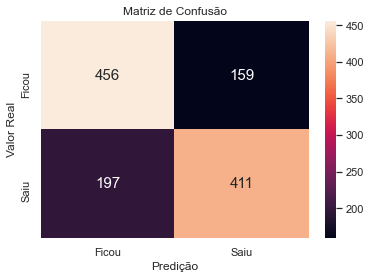

In [80]:
matrix_confusao(confusion_matrix(y_test_Amostra,svm_predicao_rbf_B))

In [81]:
sense, espec = sens_espec(y_test_Amostra,svm_predicao_rbf_B)
acc = metricas(y_test_Amostra,svm_predicao_rbf_B)
lista_scores_acc_B.append(acc)
lista_scores_espec_B.append(espec)

Sensibilidade:  0.741
Especificidade:  0.676
Acurácia:  0.709
MSE:  0.291


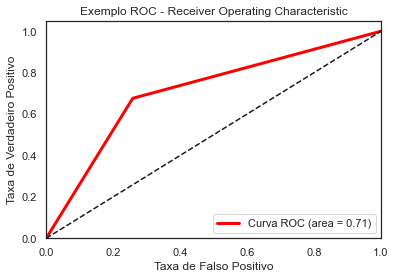

In [82]:
curva_roc(y_test_Amostra,svm_predicao_rbf_B)

## GBC
> O Gradient Boosting Classifier usa vários algoritmos para criar um algoritmo preciso mais poderoso.

> 1.DataSet Normal

In [83]:
gbc_modelo=GradientBoostingClassifier()
gbc_modelo.fit(X_train,y_train)
gbc_predicao=gbc_modelo.predict(X_test)
print(classification_report(y_test,gbc_predicao))

              precision    recall  f1-score   support

           0       0.88      0.97      0.92      2378
           1       0.80      0.47      0.59       622

    accuracy                           0.87      3000
   macro avg       0.84      0.72      0.76      3000
weighted avg       0.86      0.87      0.85      3000



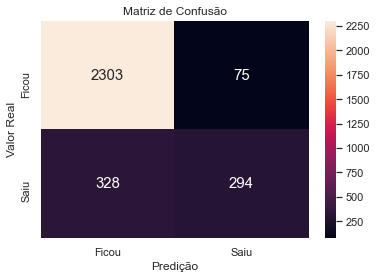

In [84]:
matrix_confusao(confusion_matrix(y_test,gbc_predicao))

In [85]:
sense, espec = sens_espec(y_test,gbc_predicao)
acc = metricas(y_test,gbc_predicao)
lista_scores_acc.append(acc)
lista_scores_espec.append(espec)

Sensibilidade:  0.968
Especificidade:  0.473
Acurácia:  0.866
MSE:  0.134


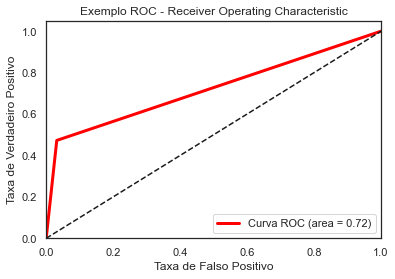

In [86]:
curva_roc(y_test,gbc_predicao)

> 2. DataSet Balanceado

In [87]:
gbc_modelo_B=GradientBoostingClassifier()
gbc_modelo_B.fit(X_train_Amostra,y_train_Amostra)
gbc_predicao_B=gbc_modelo_B.predict(X_test_Amostra)
print(classification_report(y_test_Amostra,gbc_predicao_B))

              precision    recall  f1-score   support

           0       0.78      0.79      0.78       615
           1       0.78      0.77      0.78       608

    accuracy                           0.78      1223
   macro avg       0.78      0.78      0.78      1223
weighted avg       0.78      0.78      0.78      1223



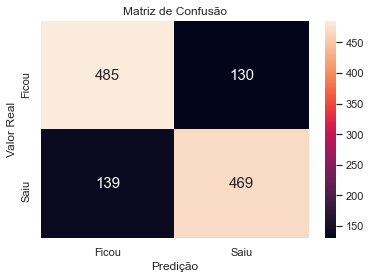

In [88]:
matrix_confusao(confusion_matrix(y_test_Amostra,gbc_predicao_B))

In [89]:
sense, espec = sens_espec(y_test_Amostra,gbc_predicao_B)
acc = metricas(y_test_Amostra,gbc_predicao_B)
lista_scores_acc_B.append(acc)
lista_scores_espec_B.append(espec)

Sensibilidade:  0.789
Especificidade:  0.771
Acurácia:  0.78
MSE:  0.22


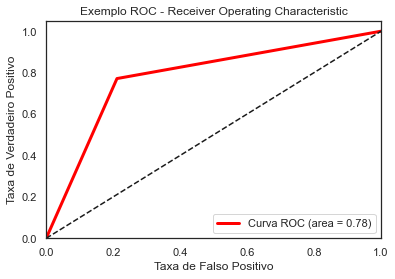

In [90]:
curva_roc(y_test_Amostra,gbc_predicao_B)

[0.825, 0.796, 0.868, 0.839, 0.866]


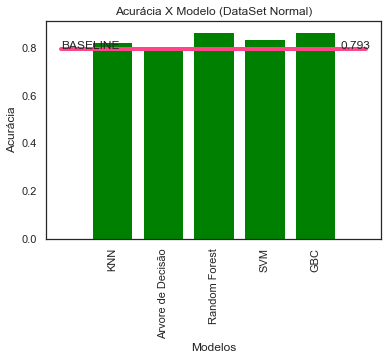

In [91]:
label = ['KNN', 'Arvore de Decisão', 'Random Forest','SVM','GBC']
label_reta = [-1,0,1,2,3,4,5]
print(lista_scores_acc)
acc = [baseline_acc,baseline_acc,baseline_acc,baseline_acc,baseline_acc,baseline_acc,baseline_acc]

# grafico de barras
plt.bar(label, lista_scores_acc, color='green')
#reta baseline
plt.plot(label_reta, acc, color = '#FF4488', linewidth=4.0)
plt.title('Acurácia X Modelo (DataSet Normal)')
plt.ylabel('Acurácia')
plt.xlabel('Modelos')
plt.xticks(rotation=90)
plt.annotate('BASELINE',(-1,baseline_acc))
plt.annotate(baseline_acc,(4.5,baseline_acc))
plt.show()


[0.694, 0.681, 0.78, 0.709, 0.78]


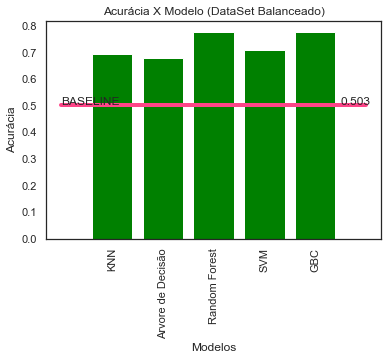

In [92]:
label = ['KNN', 'Arvore de Decisão', 'Random Forest','SVM','GBC']
label_reta = [-1,0,1,2,3,4,5]
print(lista_scores_acc_B)
acc = [baseline_acc_B,baseline_acc_B,baseline_acc_B,baseline_acc_B,baseline_acc_B,baseline_acc_B,baseline_acc_B]

# grafico de barras
plt.bar(label, lista_scores_acc_B, color='green')
#reta baseline
plt.plot(label_reta, acc, color = '#FF4488', linewidth=4.0)
plt.title('Acurácia X Modelo (DataSet Balanceado)')
plt.ylabel('Acurácia')
plt.xlabel('Modelos')
plt.xticks(rotation=90)
plt.annotate('BASELINE',(-1,baseline_acc_B))
plt.annotate(baseline_acc_B,(4.5,baseline_acc_B))
plt.show()

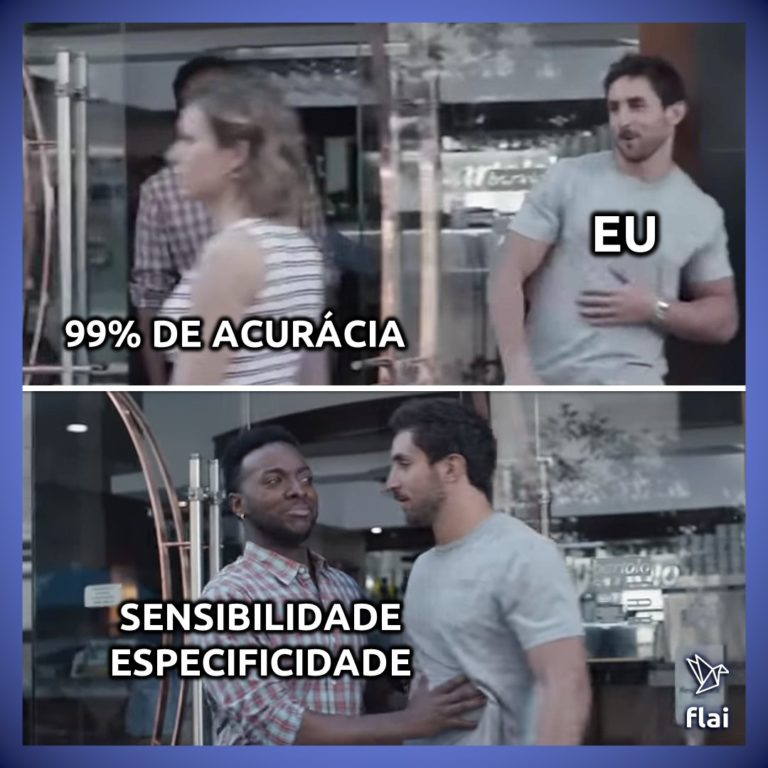

[0.336, 0.514, 0.487, 0.314, 0.473]


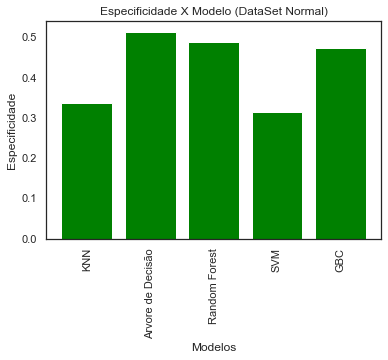

In [93]:
label = ['KNN', 'Arvore de Decisão', 'Random Forest','SVM','GBC']
print(lista_scores_espec)

# grafico de barras
plt.bar(label, lista_scores_espec, color='green')
plt.title('Especificidade X Modelo (DataSet Normal)')
plt.ylabel('Especificidade')
plt.xlabel('Modelos')
plt.xticks(rotation=90)
plt.show()

[0.666, 0.679, 0.76, 0.676, 0.771]


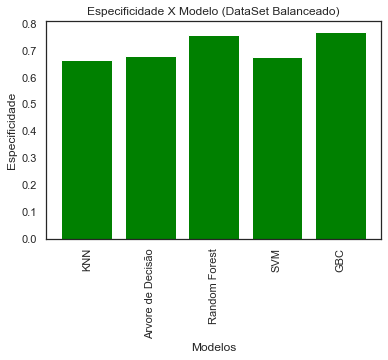

In [94]:
label = ['KNN', 'Arvore de Decisão', 'Random Forest','SVM','GBC']
print(lista_scores_espec_B)

# grafico de barras
plt.bar(label, lista_scores_espec_B, color='green')
plt.title('Especificidade X Modelo (DataSet Balanceado)')
plt.ylabel('Especificidade')
plt.xlabel('Modelos')
plt.xticks(rotation=90)
plt.show()

## Bonus MLP
> Perceptron Multicamadas (PMC ou MLP — Multi Layer Perceptron) é uma rede neural com uma ou mais camadas ocultas com um número indeterminado de neurônios. 

In [95]:
Amostra_df_2 = Amostra_df.drop(['Tenure', 'IsActiveMember', 'Geography','Gender','HasCrCard'], axis=1)

In [96]:
X_Amostra_2 = Amostra_df_2.ix[:, Amostra_df_2.columns != 'Exited']
y_Amostra_2 = Amostra_df_2.ix[:, Amostra_df_2.columns == 'Exited']

In [97]:
from sklearn.preprocessing import MinMaxScaler
normalizador = MinMaxScaler(feature_range = (0,1))

dados_normalizados = normalizador.fit_transform(X_Amostra_2)
print(dados_normalizados[0:5,])
X_Amostra_2 = dados_normalizados

[[0.538      0.32432432 0.         0.         0.50689537]
 [0.304      0.32432432 0.63635718 0.66666667 0.56983475]
 [0.59       0.35135135 0.45339436 0.33333333 0.74903429]
 [0.052      0.14864865 0.45853972 1.         0.59692246]
 [0.606      0.54054054 0.52851291 0.         0.02544093]]


In [98]:
X_train_Amostra_2, X_test_Amostra_2, y_train_Amostra_2, y_test_Amostra_2 = train_test_split(X_Amostra_2,y_Amostra_2, test_size=0.30, random_state=101)

In [99]:
from sklearn.neural_network import MLPClassifier
MLP_modelo = MLPClassifier(solver='adam', 
                          alpha=1e-5, 
                          hidden_layer_sizes=(5,5),
                          activation='relu',
                          max_iter=500,
                          random_state=1)
MLP_modelo.fit(X_train_Amostra_2,y_train_Amostra_2)
MLP_predicao = MLP_modelo.predict(X_test_Amostra_2)
print(classification_report(y_test_Amostra_2,MLP_predicao))

              precision    recall  f1-score   support

           0       0.70      0.70      0.70       615
           1       0.70      0.70      0.70       608

    accuracy                           0.70      1223
   macro avg       0.70      0.70      0.70      1223
weighted avg       0.70      0.70      0.70      1223



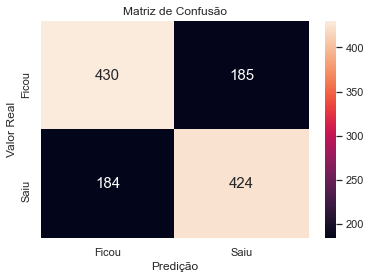

In [100]:
matrix_confusao(confusion_matrix(y_test_Amostra_2,MLP_predicao))

In [101]:
metricas(y_test_Amostra_2,MLP_predicao)
sens_espec(y_test_Amostra_2,MLP_predicao)

Acurácia:  0.698
MSE:  0.302
Sensibilidade:  0.699
Especificidade:  0.697


(0.699, 0.697)

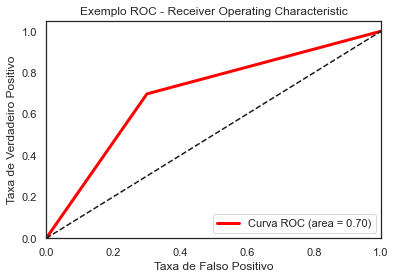

In [102]:
curva_roc(y_test_Amostra_2,MLP_predicao)

# Conclusão
> Após o comparativo das técnicas de Machine Learning, para este DataSet, o modelo mais indicado é o GBC em um ambiente balanceado, pois apresenta os melhores resultados nas métricas avaliadas, e principalmente na Especificidade, pois para o banco é muito melhor ter uma acertividade dos clientes que cancelarão suas contas, do que dos que vão continuar como cliente.
Sendo assim, o modelo GBC aponta quase 74% de acertividade dos clientes propensos a sairem.